# 2024/06/20

In [2]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_actoin_value = get_action_value(actions[i]) # i번째 action에 대한 행동 가치를 반환한다
        if cur_actoin_value > max_action_value:
            best_action = i # i번째 action을 최고의 action으로 지정
            max_action_value = cur_actoin_value
    return best_action

In [3]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10 # 슬롯머신의 개수
probs = np.random.rand(n) # 각 슬롯머신의 상금이 당첨될 확률 리스트
                          # 각 확률은 슬롯 머신 자체를 가리킴
eps = 0.1
print(probs)

def get_reward(prob, n=10):
    reward = 0
    for i in range(n): # 지정한 슬롯 머신의 레버를 n번 당긴다
        if random.random() < prob: # 무작위 확률이 각 슬롯머신의 상금 당첨 확률보다 작다면 상금에 당첨된 것으로 간주한다
            reward += 1
    return reward

reward_test = [get_reward(0.7) for _ in range(2000)]
np.mean(reward_test)

[0.88008474 0.09151689 0.38042231 0.85716788 0.5734555  0.12734114
 0.87055115 0.97113118 0.47139077 0.31723248]


7.0335

(array([  1.,   2.,  15.,  56., 173., 435., 516., 496., 306.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 9 artists>)

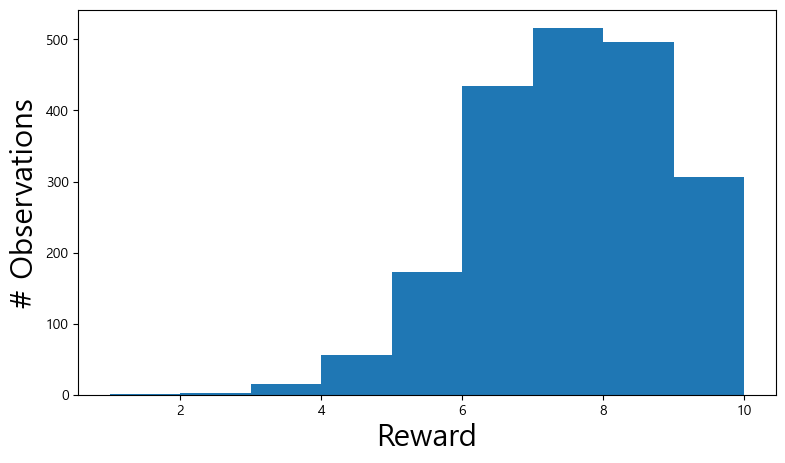

In [9]:
plt.figure(figsize=(9, 5))
plt.xlabel("Reward", fontsize=22)
plt.ylabel("# Observations", fontsize=22)
plt.hist(reward_test, bins=9) # bins=9여야 10개의 간극이 출력된다

# 2024/06/27

[0.31298708 0.39763272 0.56795799 0.82889254 0.5064818  0.65895284
 0.18865731 0.91458124 0.52638286 0.80456146]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


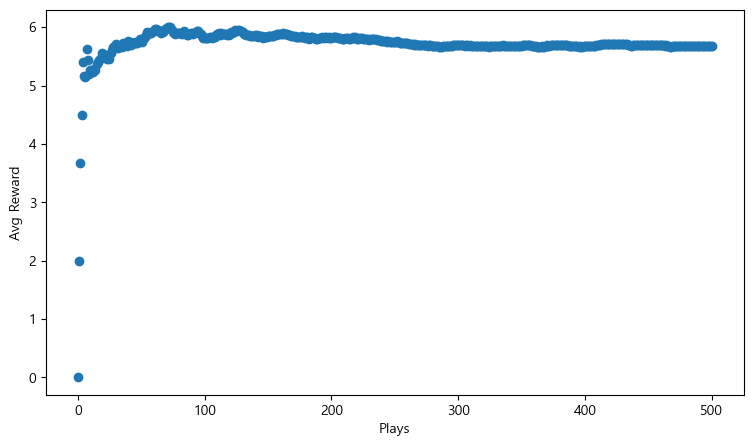

In [7]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10 # 슬롯머신의 개수
probs = np.random.rand(n) # 각 슬롯머신의 상금이 당첨될 확률 리스트
                          # 각 확률은 슬롯 머신 자체를 가리킴
eps = 0.2
print(probs)

def get_reward(prob, n=10):
    reward = 0
    for i in range(n): # 지정한 슬롯 머신의 레버를 n번 당긴다
        if random.random() < prob: # 무작위 확률이 각 슬롯머신의 상금 당첨 확률보다 작다면 상금에 당첨된 것으로 간주한다
            reward += 1
    return reward

record = np.zeros((n, 2)) # 제 1열은 해당 레버를 당긴 횟수, 제 2열은 이전까지 해당 레버를 당겼을 때 얻은 보상의 평균(누적 이동 평균)을 의미한다
print(record)

def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis=0) # 각 슬롯 머신들의 평균 보상(누적 이동 평균) 중 가장 큰 값을 가지는 슬롯 머신을 탐색
    return arm_index

def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] += new_r
    return record

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9, 5)
rewards = [0] # 매 시행까지의 얻은 보상들에 대한 평균 보상(누적 이동 평균)을 저장한다
for i in range(500):
    if random.random() > eps: # 무작위로 추출한 확률이 eps 보다 클 경우 활용(exploitation)을 수행한다
        choice = get_best_arm(record) # record를 보고 평균 보상 값이 가장 큰 슬롯 머신을 고른다
    else: # 무작위로 추출한 확률이 eps 보다 작으면 엡실론 탐욕 전략, 즉 탐험(exploration)을 수행한다
        choice = np.random.randint(10) # [0, 10) 범위의 정수 중 하나를 반환한다
    r = get_reward(probs[choice]) # 선택한 슬롯 머신에 대해 10번의 레버 내림을 수행하여 보상을 구한다
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2) # 매 시행(time step)까지 얻은 보상들에 대한 누적 이동 평균을 계산한다
    rewards.append(mean_reward)

# [0, len(rewards))의 반열림 구간에서 일정한 간격(여기서는 1)을 둔 값들을 반환한다
# len(rewards) = 시행 횟수
ax.scatter(np.arange(len(rewards)), rewards) # 좌측이 x축, 우측이 y축을 의미한다

In [4]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2024/07/19

In [3]:
np.max(np.arange(10))

9

probs : [0.03953657 0.62726979 0.18427408 0.13474426 0.16169425 0.13921791
 0.23012646 0.10914161 0.39239811 0.75172527]
501


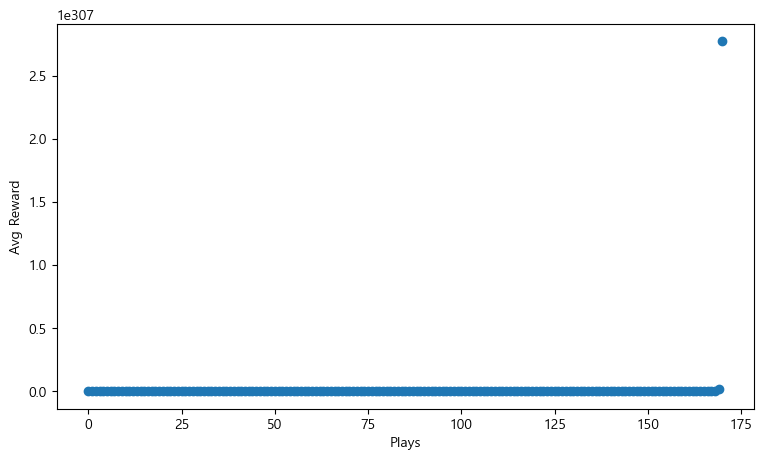

In [10]:
'''
    코렙에서는 잘 되는데 쥬피터 환경에서는 nan 오류가 계속 발생하고,
    nan 오류를 해결하더라도("- np.max(av)"를 통해) 그래프가 제대로 출력되지 않는다
    따라서 이 부분의 실습은 그냥 넘어가기로 한다
'''

import numpy as np
import matplotlib.pyplot as plt
import random

# 아래의 소프트맥스 함수를 그대로 사용하면 프로그램 실행 중간에 nan 오류가 발생하는 것을 확인할 수 있는데,
# 이는  e가 1보다 크기 때문에 거듭 제곱을 계속하면 매우 큰 수가 되어 계산에 문제가 되기 때문이다
# 따라서 입력값(여기서는 av)에서 가장 큰 값을 입력값으로부터 빼주어야 한다
def softmax(av, tau=1.12):
    softm = (np.exp(av / tau) / np.sum(np.exp(av / tau)))
    return softm

def get_reward(prob, n=10): # prob은 어떤 슬롯 머신의 레버를 당길 것인지 명시하는 역할을 한다
    reward = 0
    for i in range(n): # 지정한 슬롯 머신의 레버를 n번 당긴다
        if random.random() < prob: # 무작위 확률이 각 슬롯머신의 상금 당첨 확률보다 작다면 상금에 당첨된 것으로 간주한다
            reward += 1
    return reward
    
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] += new_r
    return record

n = 10
probs = np.random.rand(n)
print(f"probs : {probs}")
record = np.zeros((n, 2))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9, 5)

rewards = [0] # 각 시행마다 얻은 보상들을 포함한 평균을 저장한다
for i in range(500):
    p = softmax(record[:, 1], tau=0.7) # 각 동작들의 기대 보상(가치)에 대한 확률 분포를 반환한다
    # print(f"p : {p}")
    choice = np.random.choice(np.arange(n), p=p) # 소프트맥스 확률 분포에 기초하여 동작 하나를 선택한다
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r / (i + 2))
    rewards.append(mean_reward)
print(len(rewards))
ax.scatter(np.arange(len(rewards)), rewards) # 코렙에서는 잘만 되는데 여기서는 안된다

[0.71481171 0.01110214 0.49807655 0.23262182 0.83593327 0.12147106
 0.87922837 0.26199947 0.78673564 0.448897  ]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] (10, 2)


/tmp/ipykernel_1034/3592326878.py:9: RuntimeWarning: overflow encountered in exp
  softm = (np.exp(av / tau) / np.sum(np.exp(av / tau)))
/tmp/ipykernel_1034/3592326878.py:9: RuntimeWarning: invalid value encountered in divide
  softm = (np.exp(av / tau) / np.sum(np.exp(av / tau)))


ValueError: probabilities contain NaN

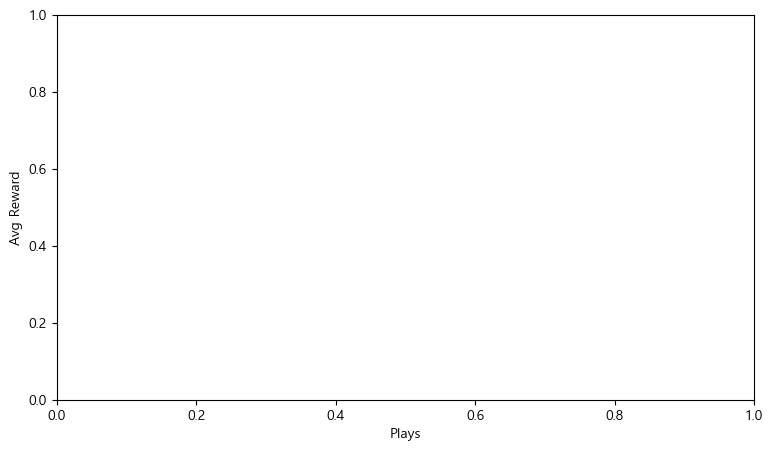